# Sentiment Analysis in Arabic tweets 


# Table of Contents

- [Part 1: Import Libraries](##part-1-import-libraries)
- [Part 2: Data Preparation](#part-2-data-preparation)
- [Part 3: Exploratory Data Analysis (EDA)](#part-3-exploratory-data-analysis-eda)
- [Part 4: Build Model](#part-4-build-model)


## Part 1:Import Libraries

In [93]:
# Import essential libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.cm as cm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
import string
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pyarabic.araby as araby
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
# read the data
df_test_neg=pd.read_csv('test_Arabic_tweets_negative_20190413.tsv', sep='\t',names=['Sentiment Label', 'Arabic tweet'])
df_test_pos=pd.read_csv('test_Arabic_tweets_positive_20190413.tsv', sep='\t',names=['Sentiment Label', 'Arabic tweet'])
df_train_neg=pd.read_csv('train_Arabic_tweets_negative_20190413.tsv', sep='\t',names=['Sentiment Label', 'Arabic tweet'])
df_train_pos=pd.read_csv('train_Arabic_tweets_positive_20190413.tsv', sep='\t',names=['Sentiment Label', 'Arabic tweet'])

In [94]:
#view first 5 rows
df_test_neg.head()

Sentiment Label                                       Arabic tweet
0             neg              ÿ≠ÿ™Ÿâ ÿßŸÑÿßŸäÿ™ŸàŸÜÿ≤ ÿÆÿ±ÿ®ÿ™ŸàŸá ŸÖŸà ÿµÿßÿ≠ŸäŸÜ ÿßŸÜÿ™Ÿàÿüÿü üò≠
1             neg  Ÿàÿßÿ≠ÿØ ÿ™ÿ®ÿπ ÿßŸÑŸÜÿ∏ÿßŸÖ ÿßŸÑÿ≥Ÿàÿ±Ÿä ŸäŸÇŸàŸÑ ÿ£ŸÜ ÿßŸÑŸÖÿÆÿßÿ®ÿ±ÿßÿ™ ÿßŸÑÿ≥Ÿàÿ±...
2             neg  ÿßŸÑŸâ ŸÖÿ™Ÿâ ÿßŸÑÿ™ÿπÿßŸÖŸÑ ÿßŸÑÿ≥ÿ¶ ŸÑŸÑÿÆÿßÿØŸÖÿßÿ™ ŸàÿπÿØŸÖ ÿßÿ≠ÿ™ÿ±ÿßŸÖŸáŸÖ ŸàŸÉ...
3             neg                  ÿ±ÿßŸäÿ≠ ÿ¨ÿßŸä Ÿä ÿ∑ÿ≠ŸÑÿ®Ÿä üê∏ #ÿßŸÑŸáŸÑÿßŸÑ_ÿßŸÑÿßŸáŸÑŸä
4             neg                                 ÿ™ÿ™ŸÖÿ∫ÿ∑ ŸàŸÖÿπŸáÿß ÿ≥ÿØÿßÿπ üò´

# Part 2: Data Preparation

In [95]:
#checking the number of rows
print(len(df_test_neg))
print(len(df_test_pos))
print(len(df_train_neg))
print(len(df_train_pos))

5768
5752
22514
22761


In [96]:
# Check for any missing (null) values in each dataset
print("Null values in df_test_neg:")
print(df_test_neg.isnull().sum())
print("\nNull values in df_test_pos:")
print(df_test_pos.isnull().sum())
print("\nNull values in df_train_neg:")
print(df_train_neg.isnull().sum())
print("\nNull values in df_train_pos:")
print(df_train_pos.isnull().sum())


Null values in df_test_neg:
Sentiment Label    0
Arabic tweet       0
dtype: int64

Null values in df_test_pos:
Sentiment Label    0
Arabic tweet       0
dtype: int64

Null values in df_train_neg:
Sentiment Label    0
Arabic tweet       0
dtype: int64

Null values in df_train_pos:
Sentiment Label    0
Arabic tweet       0
dtype: int64


In [97]:
df_test_neg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5768 entries, 0 to 5767
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sentiment Label  5768 non-null   object
 1   Arabic tweet     5768 non-null   object
dtypes: object(2)
memory usage: 90.3+ KB


In [98]:
df_test_pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5752 entries, 0 to 5751
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sentiment Label  5752 non-null   object
 1   Arabic tweet     5752 non-null   object
dtypes: object(2)
memory usage: 90.0+ KB


In [99]:
df_train_neg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22514 entries, 0 to 22513
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sentiment Label  22514 non-null  object
 1   Arabic tweet     22514 non-null  object
dtypes: object(2)
memory usage: 351.9+ KB


In [100]:
df_train_pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22761 entries, 0 to 22760
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sentiment Label  22761 non-null  object
 1   Arabic tweet     22761 non-null  object
dtypes: object(2)
memory usage: 355.8+ KB


### Cleaning the Arabic Tweets

In [101]:
# Remove specific unwanted characters from the tweets
for letter in '#.][!XR':
    df_test_neg['Arabic tweet'] = df_test_neg['Arabic tweet'].astype(str).str.replace(letter,'')
    df_test_pos['Arabic tweet'] = df_test_pos['Arabic tweet'].astype(str).str.replace(letter,'')
    df_train_neg['Arabic tweet'] = df_train_neg['Arabic tweet'].astype(str).str.replace(letter,'')
    df_train_pos['Arabic tweet'] = df_train_pos['Arabic tweet'].astype(str).str.replace(letter,'')

In [102]:
df_test_pos.head()

Sentiment Label                                       Arabic tweet
0             pos  ÿßŸÑŸáŸÑÿßŸÑ_ÿßŸÑÿßŸáŸÑŸä ŸÅŸàÿ≤ ŸáŸÑÿßŸÑŸä ŸÖŸáŸÖ ÿßŸÑÿ≠ŸÖÿØ ŸÑŸÑŸá üíô ÿ≤Ÿàÿ±ÿßŸÜ ...
1             pos                               ÿµÿ®ÿßÿ≠ŸÉ ÿÆŸäÿ±ÿßÿ™ ŸàŸÖÿ≥ÿ±ÿßÿ™ üå∏
2             pos  ÿ™ÿ£ŸÖŸÑ ŸÇÿßŸÑ ÿßŸÑŸÑŸá Ô∑ª :- _*‚ÄãÔ¥øÿ®ŸàÿßÿØ ÿ∫Ÿäÿ± ÿ∞Ÿä ÿ≤ÿ±ÿπ Ô¥æ*_ üí´üí´ ...
3             pos  üòÇüòÇ Ÿäÿß ÿ¨ÿØÿπÿßŸÜ ÿßŸÑÿ±ÿ¨ÿßŸÑŸá ÿßŸÑŸÑŸä ŸÅŸàŸÇ ÿßŸÑ ÿØŸàŸÑ ÿÆÿ∑ÿ± ÿπ ÿ™ŸàŸäÿ™...
4             pos  ÿ±ÿ≥ÿßŸÑŸá ÿµÿ®ÿßÿ≠ŸäŸá : üíõ ÿßŸÑŸÑŸáŸÖ ÿßÿ≥ÿ£ŸÑŸÉ ÿßŸÑÿ™ŸàŸÅŸäŸÇ ŸÅŸä ÿ¨ŸÖŸäÿπ ÿß...

In [103]:
#Define punctuation lists 
arabic_punctuations = '''`√∑√óÿõ<>_()*&^%][ŸÄÿå/:"ÿü.,'{}~¬¶+|!‚Äù‚Ä¶‚Äú‚ÄìŸÄ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations
# Function to remove all punctuation from text
def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [104]:
#normalize_arabic_text
def normalize_arabic(text):
    text = re.sub("[ÿ•ÿ£ÿ¢ÿß]", "ÿß", text)
    text = re.sub("Ÿâ", "Ÿä", text)
    text = re.sub("ÿ©", "Ÿá", text)
    text = re.sub("⁄Ø", "ŸÉ", text)
    return text

In [105]:
# remove_repeating_char
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [106]:
# strip_diacritics
df_test_neg['Arabic tweet'] = df_test_neg['Arabic tweet'].apply(araby.strip_diacritics)
df_test_pos['Arabic tweet'] = df_test_pos['Arabic tweet'].apply(araby.strip_diacritics)
df_train_neg['Arabic tweet'] = df_train_neg['Arabic tweet'].apply(araby.strip_diacritics)
df_train_pos['Arabic tweet'] = df_train_pos['Arabic tweet'].apply(araby.strip_diacritics)

In [107]:
df_test_neg.head()

Sentiment Label                                       Arabic tweet
0             neg              ÿ≠ÿ™Ÿâ ÿßŸÑÿßŸäÿ™ŸàŸÜÿ≤ ÿÆÿ±ÿ®ÿ™ŸàŸá ŸÖŸà ÿµÿßÿ≠ŸäŸÜ ÿßŸÜÿ™Ÿàÿüÿü üò≠
1             neg  Ÿàÿßÿ≠ÿØ ÿ™ÿ®ÿπ ÿßŸÑŸÜÿ∏ÿßŸÖ ÿßŸÑÿ≥Ÿàÿ±Ÿä ŸäŸÇŸàŸÑ ÿ£ŸÜ ÿßŸÑŸÖÿÆÿßÿ®ÿ±ÿßÿ™ ÿßŸÑÿ≥Ÿàÿ±...
2             neg  ÿßŸÑŸâ ŸÖÿ™Ÿâ ÿßŸÑÿ™ÿπÿßŸÖŸÑ ÿßŸÑÿ≥ÿ¶ ŸÑŸÑÿÆÿßÿØŸÖÿßÿ™ ŸàÿπÿØŸÖ ÿßÿ≠ÿ™ÿ±ÿßŸÖŸáŸÖ ŸàŸÉ...
3             neg                   ÿ±ÿßŸäÿ≠ ÿ¨ÿßŸä Ÿä ÿ∑ÿ≠ŸÑÿ®Ÿä üê∏ ÿßŸÑŸáŸÑÿßŸÑ_ÿßŸÑÿßŸáŸÑŸä
4             neg                                 ÿ™ÿ™ŸÖÿ∫ÿ∑ ŸàŸÖÿπŸáÿß ÿ≥ÿØÿßÿπ üò´

In [108]:
#Remove and replace mentions, hashtags, links and special characters
def processPost(text): 

    text = re.sub('@[^\s]+', ' ', text)
    
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)
    
    text = re.sub(r'#([^\s]+)', r'\1', text)

    text= remove_punctuations(text)
    
    text=remove_repeating_char(text)
    
    return text

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Mua\AppData\Local\Temp\ipykernel_21864\2842269798.py:4: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('@[^\s]+', ' ', text)
C:\Users\Mua\AppData\Local\Temp\ipykernel_21864\2842269798.py:6: SyntaxWarning: invalid escape sequence '\.'
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)


In [109]:
# apply used to call the method processpost
df_test_neg["Arabic tweet"] = df_test_neg['Arabic tweet'].apply(lambda x: processPost(x)) 
df_test_pos["Arabic tweet"] = df_test_pos['Arabic tweet'].apply(lambda x: processPost(x)) 
df_train_neg["Arabic tweet"] = df_train_neg['Arabic tweet'].apply(lambda x: processPost(x)) 
df_train_pos["Arabic tweet"] = df_train_pos['Arabic tweet'].apply(lambda x: processPost(x))

In [110]:
# Initialize a RegexpTokenizer to capture word characters
tokenizer = RegexpTokenizer(r'\w+')
# Apply tokenization on the "Arabic tweet" column for each dataset
df_test_neg['tokens'] = df_test_neg["Arabic tweet"].apply(tokenizer.tokenize)
df_test_pos['tokens'] = df_test_pos["Arabic tweet"].apply(tokenizer.tokenize)
df_train_neg['tokens'] = df_train_neg["Arabic tweet"].apply(tokenizer.tokenize)
df_train_pos['tokens'] = df_train_pos["Arabic tweet"].apply(tokenizer.tokenize)


In [111]:
# check new column tokens
df_test_neg.head()

Sentiment Label                                       Arabic tweet  \
0             neg                ÿ≠ÿ™Ÿâ ÿßŸÑÿßŸäÿ™ŸàŸÜÿ≤ ÿÆÿ±ÿ®ÿ™ŸàŸá ŸÖŸà ÿµÿßÿ≠ŸäŸÜ ÿßŸÜÿ™Ÿà üò≠   
1             neg  Ÿàÿßÿ≠ÿØ ÿ™ÿ®ÿπ ÿßŸÑŸÜÿ∏ÿßŸÖ ÿßŸÑÿ≥Ÿàÿ±Ÿä ŸäŸÇŸàŸÑ ÿ£ŸÜ ÿßŸÑŸÖÿÆÿßÿ®ÿ±ÿßÿ™ ÿßŸÑÿ≥Ÿàÿ±...   
2             neg  ÿßŸÑŸâ ŸÖÿ™Ÿâ ÿßŸÑÿ™ÿπÿßŸÖŸÑ ÿßŸÑÿ≥ÿ¶ ŸÑÿÆÿßÿØŸÖÿßÿ™ ŸàÿπÿØŸÖ ÿßÿ≠ÿ™ÿ±ÿßŸÖŸáŸÖ ŸàŸÉÿ£...   
3             neg                    ÿ±ÿßŸäÿ≠ ÿ¨ÿßŸä Ÿä ÿ∑ÿ≠ŸÑÿ®Ÿä üê∏ ÿßŸÑŸáŸÑÿßŸÑÿßŸÑÿßŸáŸÑŸä   
4             neg                                  ÿ™ŸÖÿ∫ÿ∑ ŸàŸÖÿπŸáÿß ÿ≥ÿØÿßÿπ üò´   

                                              tokens  
0           [ÿ≠ÿ™Ÿâ, ÿßŸÑÿßŸäÿ™ŸàŸÜÿ≤, ÿÆÿ±ÿ®ÿ™ŸàŸá, ŸÖŸà, ÿµÿßÿ≠ŸäŸÜ, ÿßŸÜÿ™Ÿà]  
1  [Ÿàÿßÿ≠ÿØ, ÿ™ÿ®ÿπ, ÿßŸÑŸÜÿ∏ÿßŸÖ, ÿßŸÑÿ≥Ÿàÿ±Ÿä, ŸäŸÇŸàŸÑ, ÿ£ŸÜ, ÿßŸÑŸÖÿÆÿßÿ®ÿ±ÿß...  
2  [ÿßŸÑŸâ, ŸÖÿ™Ÿâ, ÿßŸÑÿ™ÿπÿßŸÖŸÑ, ÿßŸÑÿ≥ÿ¶, ŸÑÿÆÿßÿØŸÖÿßÿ™, ŸàÿπÿØŸÖ, ÿßÿ≠ÿ™ÿ±ÿß...  
3                [ÿ±ÿßŸäÿ≠, ÿ¨ÿßŸä, Ÿä, ÿ∑ÿ≠ŸÑÿ®Ÿä, ÿßŸÑŸáŸÑÿßŸÑÿßŸÑÿßŸáŸÑŸä]  
4                                [ÿ™ŸÖÿ∫ÿ∑, ŸàŸÖÿπŸáÿß, ÿ≥ÿØÿßÿπ]

In [112]:
# list arabic stopwords
stopwords_list = stopwords.words('arabic')
# Display the stopwords list and the count of stopwords
print(stopwords_list)
print("Number of stopwords:", len(stopwords_list))

['ÿ•ÿ∞', 'ÿ•ÿ∞ÿß', 'ÿ•ÿ∞ŸÖÿß', 'ÿ•ÿ∞ŸÜ', 'ÿ£ŸÅ', 'ÿ£ŸÇŸÑ', 'ÿ£ŸÉÿ´ÿ±', 'ÿ£ŸÑÿß', 'ÿ•ŸÑÿß', 'ÿßŸÑÿ™Ÿä', 'ÿßŸÑÿ∞Ÿä', 'ÿßŸÑÿ∞ŸäŸÜ', 'ÿßŸÑŸÑÿßÿ™Ÿä', 'ÿßŸÑŸÑÿßÿ¶Ÿä', 'ÿßŸÑŸÑÿ™ÿßŸÜ', 'ÿßŸÑŸÑÿ™Ÿäÿß', 'ÿßŸÑŸÑÿ™ŸäŸÜ', 'ÿßŸÑŸÑÿ∞ÿßŸÜ', 'ÿßŸÑŸÑÿ∞ŸäŸÜ', 'ÿßŸÑŸÑŸàÿßÿ™Ÿä', 'ÿ•ŸÑŸâ', 'ÿ•ŸÑŸäŸÉ', 'ÿ•ŸÑŸäŸÉŸÖ', 'ÿ•ŸÑŸäŸÉŸÖÿß', 'ÿ•ŸÑŸäŸÉŸÜ', 'ÿ£ŸÖ', 'ÿ£ŸÖÿß', 'ÿ£ŸÖÿß', 'ÿ•ŸÖÿß', 'ÿ£ŸÜ', 'ÿ•ŸÜ', 'ÿ•ŸÜÿß', 'ÿ£ŸÜÿß', 'ÿ£ŸÜÿ™', 'ÿ£ŸÜÿ™ŸÖ', 'ÿ£ŸÜÿ™ŸÖÿß', 'ÿ£ŸÜÿ™ŸÜ', 'ÿ•ŸÜŸÖÿß', 'ÿ•ŸÜŸá', 'ÿ£ŸÜŸâ', 'ÿ£ŸÜŸâ', 'ÿ¢Ÿá', 'ÿ¢Ÿáÿß', 'ÿ£Ÿà', 'ÿ£ŸàŸÑÿßÿ°', 'ÿ£ŸàŸÑÿ¶ŸÉ', 'ÿ£ŸàŸá', 'ÿ¢Ÿä', 'ÿ£Ÿä', 'ÿ£ŸäŸáÿß', 'ÿ•Ÿä', 'ÿ£ŸäŸÜ', 'ÿ£ŸäŸÜ', 'ÿ£ŸäŸÜŸÖÿß', 'ÿ•ŸäŸá', 'ÿ®ÿÆ', 'ÿ®ÿ≥', 'ÿ®ÿπÿØ', 'ÿ®ÿπÿ∂', 'ÿ®ŸÉ', 'ÿ®ŸÉŸÖ', 'ÿ®ŸÉŸÖ', 'ÿ®ŸÉŸÖÿß', 'ÿ®ŸÉŸÜ', 'ÿ®ŸÑ', 'ÿ®ŸÑŸâ', 'ÿ®ŸÖÿß', 'ÿ®ŸÖÿßÿ∞ÿß', 'ÿ®ŸÖŸÜ', 'ÿ®ŸÜÿß', 'ÿ®Ÿá', 'ÿ®Ÿáÿß', 'ÿ®ŸáŸÖ', 'ÿ®ŸáŸÖÿß', 'ÿ®ŸáŸÜ', 'ÿ®Ÿä', 'ÿ®ŸäŸÜ', 'ÿ®ŸäÿØ', 'ÿ™ŸÑŸÉ', 'ÿ™ŸÑŸÉŸÖ', 'ÿ™ŸÑŸÉŸÖÿß', 'ÿ™Ÿá', 'ÿ™Ÿä', 'ÿ™ŸäŸÜ', 'ÿ™ŸäŸÜŸÉ', 'ÿ´ŸÖ', 'ÿ´ŸÖÿ©', 'ÿ≠ÿßÿ¥ÿß', 'ÿ≠ÿ®ÿ∞ÿß', 'ÿ≠ÿ™Ÿâ', 'ÿ≠Ÿäÿ´', 'ÿ≠Ÿä

# Part 3: Exploratory data analysis (EDA)

In [113]:
# make merged dataframe to make EDA
df_mearge_pos=pd.concat([df_train_pos,df_test_pos])
df_mearge_neg=pd.concat([df_train_neg,df_test_neg])

In [114]:
# check merged dataframe
df_mearge_pos

Sentiment Label                                       Arabic tweet  \
0                pos  ŸÜÿ≠ŸÜ ÿßŸÑÿ∞ŸäŸÜ Ÿäÿ™ÿ≠ŸàŸÑ ŸÉŸÑ ŸÖÿß ŸÜŸàÿØ ÿ£ŸÜ ŸÜŸÇŸàŸÑŸá ÿ•ŸÑŸâ ÿØÿπÿßÿ° ŸÑŸá...   
1                pos  ŸàŸÅŸä ÿßŸÑŸÜŸáÿßŸäÿ© ŸÑŸÜ Ÿäÿ®ŸÇŸâ ŸÖÿπŸÉ ÿ¢ÿ≠ÿØÿ•ŸÑÿß ŸÖŸÜ ÿ±ÿ£Ÿâ ÿßŸÑÿ¨ŸÖÿßŸÑ ŸÅ...   
2                pos                                    ŸÖŸÜ ÿßŸÑÿÆŸäÿ± ŸÜŸÅÿ≥Ÿá üíõ   
3                pos  ÿ≤ŸÑÿ≤ŸÑÿßŸÑŸÖŸÑÿπÿ®ŸÜÿµÿ±ŸÜÿßÿ®ŸäŸÑÿπÿ® ŸÉŸÜ ÿπÿßŸÑŸä ÿßŸÑŸáŸÖŸá ŸàŸÑÿß ÿ™ÿ±ÿ∂Ÿâ ÿ®ÿ∫...   
4                pos  ÿßŸÑÿ¥Ÿäÿ° ÿßŸÑŸàÿ≠ŸäÿØ ÿßŸÑÿ∞Ÿä ŸàÿµŸÑŸàÿß ŸÅŸäŸá ŸÑÿπÿßŸÑŸÖŸäÿ© ŸáŸà ÿßŸÑŸÖÿ≥Ÿäÿßÿ±...   
...              ...                                                ...   
5747             pos  ÿ±ÿ®Ÿä ÿßÿ∫ŸÅÿ± ŸÑŸä Ÿà ŸÑŸàÿßŸÑÿØŸä Ÿà ŸÑÿ£ÿ≠ÿ®ÿ™Ÿä Ÿà ŸÑŸÖÿ§ŸÖŸÜŸäŸÜ Ÿà ÿßŸÑŸÖÿ§...   
5748             pos                                 ÿ±ÿ®Ÿä Ÿäÿ≥ÿπÿØŸÜÿß ŸàŸäÿßŸÉŸÖ üíõ   
5749             pos  Ÿäÿ™ÿ≠ÿØÿ´ŸàŸÜ ÿπŸÜ ÿßÿÆŸÑÿßŸÇ ÿ≠ÿ≥ŸäŸÜ ŸàŸÜÿ¨ŸàŸÖ ŸÅÿ±ŸÇŸáŸÖ ŸÜŸáÿßŸäÿßÿ™ŸáŸÖ ÿßŸÑÿ±...   
5750             pos  ÿµÿ®ÿßÿ≠ŸÉŸÖ ÿßÿ≠ÿ™ŸÅÿßŸÑŸäÿ© ŸÑŸÖ ÿ™ŸÉÿ™ŸÖŸÑ Ÿàÿµÿßÿ≠ÿ® ÿßŸÑÿßÿ≠ÿ™ŸÅÿßŸÑŸäŸá ŸÖÿßŸÉŸÖ...   
5751             pos      ŸÇŸÑÿ™ ŸÑŸÉŸÖ ÿ≥ÿßÿ®ŸÇÿß ÿßŸÑŸÖÿπŸäŸàŸÅ ÿπŸÜÿØŸÖÿß ÿ™ÿ≠ÿ™ÿßÿ¨Ÿá ŸÑÿß ŸäÿÆÿ∞ŸÑŸÉ üíô   

                                                 tokens  
0     [ŸÜÿ≠ŸÜ, ÿßŸÑÿ∞ŸäŸÜ, Ÿäÿ™ÿ≠ŸàŸÑ, ŸÉŸÑ, ŸÖÿß, ŸÜŸàÿØ, ÿ£ŸÜ, ŸÜŸÇŸàŸÑŸá, ÿ•ŸÑ...  
1     [ŸàŸÅŸä, ÿßŸÑŸÜŸáÿßŸäÿ©, ŸÑŸÜ, Ÿäÿ®ŸÇŸâ, ŸÖÿπŸÉ, ÿ¢ÿ≠ÿØÿ•ŸÑÿß, ŸÖŸÜ, ÿ±ÿ£Ÿâ,...  
2                                     [ŸÖŸÜ, ÿßŸÑÿÆŸäÿ±, ŸÜŸÅÿ≥Ÿá]  
3     [ÿ≤ŸÑÿ≤ŸÑÿßŸÑŸÖŸÑÿπÿ®ŸÜÿµÿ±ŸÜÿßÿ®ŸäŸÑÿπÿ®, ŸÉŸÜ, ÿπÿßŸÑŸä, ÿßŸÑŸáŸÖŸá, ŸàŸÑÿß, ÿ™...  
4     [ÿßŸÑÿ¥Ÿäÿ°, ÿßŸÑŸàÿ≠ŸäÿØ, ÿßŸÑÿ∞Ÿä, ŸàÿµŸÑŸàÿß, ŸÅŸäŸá, ŸÑÿπÿßŸÑŸÖŸäÿ©, ŸáŸà,...  
...                                                 ...  
5747  [ÿ±ÿ®Ÿä, ÿßÿ∫ŸÅÿ±, ŸÑŸä, Ÿà, ŸÑŸàÿßŸÑÿØŸä, Ÿà, ŸÑÿ£ÿ≠ÿ®ÿ™Ÿä, Ÿà, ŸÑŸÖÿ§ŸÖŸÜ...  
5748                               [ÿ±ÿ®Ÿä, Ÿäÿ≥ÿπÿØŸÜÿß, ŸàŸäÿßŸÉŸÖ]  
5749  [Ÿäÿ™ÿ≠ÿØÿ´ŸàŸÜ, ÿπŸÜ, ÿßÿÆŸÑÿßŸÇ, ÿ≠ÿ≥ŸäŸÜ, ŸàŸÜÿ¨ŸàŸÖ, ŸÅÿ±ŸÇŸáŸÖ, ŸÜŸáÿßŸäÿß...  
5750  [ÿµÿ®ÿßÿ≠ŸÉŸÖ, ÿßÿ≠ÿ™ŸÅÿßŸÑŸäÿ©, ŸÑŸÖ, ÿ™ŸÉÿ™ŸÖŸÑ, Ÿàÿµÿßÿ≠ÿ®, ÿßŸÑÿßÿ≠ÿ™ŸÅÿßŸÑŸä...  
5751  [ŸÇŸÑÿ™, ŸÑŸÉŸÖ, ÿ≥ÿßÿ®ŸÇÿß, ÿßŸÑŸÖÿπŸäŸàŸÅ, ÿπŸÜÿØŸÖÿß, ÿ™ÿ≠ÿ™ÿßÿ¨Ÿá, ŸÑÿß, ...  

[28513 rows x 3 columns]

In [115]:
# check merged dataframe
df_mearge_neg

Sentiment Label                                       Arabic tweet  \
0                neg  ÿßÿπÿ™ÿ±ŸÅ ÿßŸÜ ÿ®ÿ™ÿ≥ ŸÉÿßŸÜŸà ÿ¥ŸàŸä ÿ¥ŸàŸä Ÿäÿ¨Ÿäÿ®Ÿà ÿ±ÿßÿ≥Ÿä ŸÑŸÉŸÜ ÿßŸÑŸäŸàŸÖ...   
1                neg  ÿ™ŸàŸÇÿπÿ™ ÿßÿ∞ÿß ÿ¨ÿßÿ™ ÿØÿßÿ±Ÿäÿß ÿ®ÿ¥ŸàŸÅŸáŸÖ ŸÉÿßŸÖŸÑŸäŸÜ ÿ®ÿ≥ ŸÑŸä ŸÑÿ≠ŸäŸÜ ÿß...   
2                neg  ÿßŸÑÿßŸáŸÑŸäÿßŸÑŸáŸÑÿßŸÑ ÿßŸÉÿ™ÿ® ÿ™ŸàŸÇÿπŸÉ ŸÑŸÜÿ™Ÿäÿ¨ÿ© ŸÑŸÇÿßÿ° ÿßŸÑŸáŸÑÿßŸÑ ŸàÿßŸÑ...   
3                neg  ŸÜÿπŸÖÿ© ÿßŸÑŸÖÿ∂ÿßÿØÿßÿ™ ÿßŸÑÿ≠ŸäŸàŸäÿ© ÿ™ÿ∂ÿπ ŸÇÿ∑ÿ±ÿ©üíßŸÖÿ∂ÿßÿØ ÿ®ŸÜÿ≥ŸÑŸäŸÜ ÿπŸÑŸâ...   
4                neg                             ÿßŸÑÿØŸàÿØŸà ÿ¨ÿßŸäŸá ÿ™ŸÉŸÖŸÑ ÿπŸÑŸä üíî   
...              ...                                                ...   
5763             neg  ÿßŸÑŸÜŸàŸÖ ŸàÿßŸÜÿ™ ŸÖŸÉÿ≥Ÿàÿ± ÿØŸá ÿßÿ≠ÿ≥ÿßÿ≥ ÿ∫ÿ®Ÿä ÿßŸÑŸä ŸáŸà ŸÖÿ¥ ŸÇÿßÿØÿ± ÿ™...   
5764             neg  ÿßÿ≥ÿ™ÿ¥ŸáÿßÿØÿßŸÑÿßŸÖÿßŸÖŸÉÿßÿ∏ŸÖÿßŸÑÿ∫Ÿäÿ∏ ÿßŸÑÿ≥ŸÑÿßŸÖ ÿπŸÑŸâ ÿßŸÑŸÖÿπÿ∞ÿ® ŸÅŸä ŸÇÿπ...   
5765             neg                          ÿßŸÜÿß ŸÉŸÜÿ™ ÿßŸÉŸÑ ÿßŸÑÿµÿ≠ŸÜ ÿ®ŸÉÿ®ÿ±Ÿá üòê   
5766             neg  ŸÇŸàŸÑŸàÿß ŸÑŸä ÿßŸäÿ¥ ÿ™ÿ¥ŸàŸÅŸàÿß ŸÖÿπ ŸÖŸÑÿßÿ≠ÿ∏ÿ© ÿßŸÑÿ™ŸÑÿ∑ŸÅ ŸÑÿ£ŸÜŸá ÿßŸÑŸÖŸà...   
5767             neg  ‚úç ÿ•ÿ∞ÿß ÿ£ÿ±ÿØÿ™ ÿ£ŸÜ ÿ™ÿπÿ±ŸÅ ÿ¥Ÿäÿ¶ÿß ÿπŸÜŸä ÿ•ÿ≥ÿßŸÑŸÜŸä ŸÇÿ®ŸÑ ÿ£ŸÜ ÿ™ÿ≥ÿ£ŸÑ...   

                                                 tokens  
0     [ÿßÿπÿ™ÿ±ŸÅ, ÿßŸÜ, ÿ®ÿ™ÿ≥, ŸÉÿßŸÜŸà, ÿ¥ŸàŸä, ÿ¥ŸàŸä, Ÿäÿ¨Ÿäÿ®Ÿà, ÿ±ÿßÿ≥Ÿä, ...  
1     [ÿ™ŸàŸÇÿπÿ™, ÿßÿ∞ÿß, ÿ¨ÿßÿ™, ÿØÿßÿ±Ÿäÿß, ÿ®ÿ¥ŸàŸÅŸáŸÖ, ŸÉÿßŸÖŸÑŸäŸÜ, ÿ®ÿ≥, ŸÑ...  
2     [ÿßŸÑÿßŸáŸÑŸäÿßŸÑŸáŸÑÿßŸÑ, ÿßŸÉÿ™ÿ®, ÿ™ŸàŸÇÿπŸÉ, ŸÑŸÜÿ™Ÿäÿ¨ÿ©, ŸÑŸÇÿßÿ°, ÿßŸÑŸáŸÑ...  
3     [ŸÜÿπŸÖÿ©, ÿßŸÑŸÖÿ∂ÿßÿØÿßÿ™, ÿßŸÑÿ≠ŸäŸàŸäÿ©, ÿ™ÿ∂ÿπ, ŸÇÿ∑ÿ±ÿ©, ŸÖÿ∂ÿßÿØ, ÿ®ŸÜÿ≥...  
4                             [ÿßŸÑÿØŸàÿØŸà, ÿ¨ÿßŸäŸá, ÿ™ŸÉŸÖŸÑ, ÿπŸÑŸä]  
...                                                 ...  
5763  [ÿßŸÑŸÜŸàŸÖ, ŸàÿßŸÜÿ™, ŸÖŸÉÿ≥Ÿàÿ±, ÿØŸá, ÿßÿ≠ÿ≥ÿßÿ≥, ÿ∫ÿ®Ÿä, ÿßŸÑŸä, ŸáŸà, ...  
5764  [ÿßÿ≥ÿ™ÿ¥ŸáÿßÿØÿßŸÑÿßŸÖÿßŸÖŸÉÿßÿ∏ŸÖÿßŸÑÿ∫Ÿäÿ∏, ÿßŸÑÿ≥ŸÑÿßŸÖ, ÿπŸÑŸâ, ÿßŸÑŸÖÿπÿ∞ÿ®, ...  
5765                      [ÿßŸÜÿß, ŸÉŸÜÿ™, ÿßŸÉŸÑ, ÿßŸÑÿµÿ≠ŸÜ, ÿ®ŸÉÿ®ÿ±Ÿá]  
5766  [ŸÇŸàŸÑŸàÿß, ŸÑŸä, ÿßŸäÿ¥, ÿ™ÿ¥ŸàŸÅŸàÿß, ŸÖÿπ, ŸÖŸÑÿßÿ≠ÿ∏ÿ©, ÿßŸÑÿ™ŸÑÿ∑ŸÅ, ŸÑ...  
5767  [ÿ•ÿ∞ÿß, ÿ£ÿ±ÿØÿ™, ÿ£ŸÜ, ÿ™ÿπÿ±ŸÅ, ÿ¥Ÿäÿ¶ÿß, ÿπŸÜŸä, ÿ•ÿ≥ÿßŸÑŸÜŸä, ŸÇÿ®ŸÑ, ...  

[28282 rows x 3 columns]

In [116]:
# see the most word frequancy in postive with number of frequancy
df_mearge_pos['tokens'].explode().value_counts()

tokens
ŸÖŸÜ           6534
ÿßŸÑŸá          5354
ŸÅŸä           5164
ÿπŸÑŸâ          4144
Ÿà            3618
             ... 
ŸàÿßŸÑÿÆŸäÿßŸÑÿßÿ™       1
ŸàÿßŸÑÿ™ÿ£ŸÖŸÑÿßÿ™       1
ÿ≥ŸÉÿ±Ÿàÿ≤           1
ÿ®ÿ∑ÿßŸäŸá           1
ÿ±ÿßÿ≥ÿ®ŸäŸÜ          1
Name: count, Length: 48503, dtype: int64

In [117]:
# see the most word frequancy in negtive with number of frequancy
df_mearge_neg['tokens'].explode().value_counts()

tokens
ŸÖŸÜ             6468
ŸÅŸä             4313
Ÿà              3363
ÿßŸÑŸá            3101
ŸÖÿß             2601
               ... 
ÿ®ÿßÿπÿµÿßÿ®Ÿä           1
Ÿäÿ¨ŸÖÿØ              1
ŸÉŸäŸÅŸáÿßŸÑÿßÿ∫ŸÜŸäÿ©       1
ÿ¥ŸÑÿ≠ŸÑŸà             1
ÿ´ÿßŸÇŸÑ              1
Name: count, Length: 46936, dtype: int64

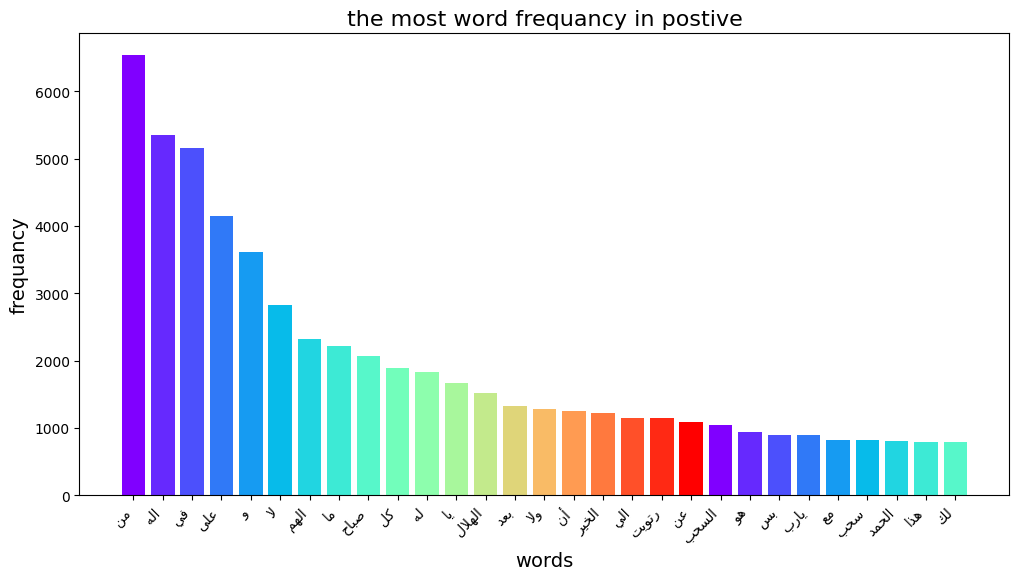

In [118]:
# get the most word frequancy in postive
token_counts = df_mearge_pos['tokens'].explode().value_counts().head(30)
token_counts = token_counts[~token_counts.index.isin(["pos"])]

# Reshape each token for proper Arabic rendering:
reshaped_tokens = [get_display(arabic_reshaper.reshape(token)) for token in token_counts.index]



# make color for bar chart
colors = cm.rainbow(np.linspace(0, 1, 20))

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(reshaped_tokens, token_counts.values, color=colors)

title_ar = get_display(arabic_reshaper.reshape("the most word frequancy in postive"))
xlabel_ar = get_display(arabic_reshaper.reshape("words"))
ylabel_ar = get_display(arabic_reshaper.reshape("frequancy"))

ax.set_title(title_ar, fontsize=16)
ax.set_xlabel(xlabel_ar, fontsize=14)
ax.set_ylabel(ylabel_ar, fontsize=14)

plt.xticks(rotation=45, ha='right')
plt.show()


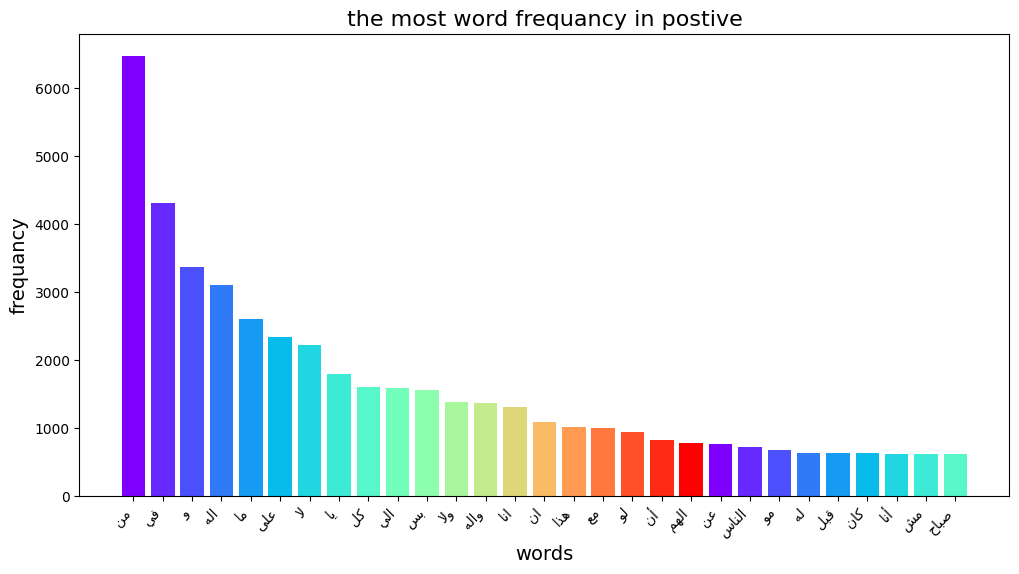

In [119]:
# get the most word frequancy in negtive
token_counts = df_mearge_neg['tokens'].explode().value_counts().head(30)
token_counts = token_counts[~token_counts.index.isin(["neg"])]

# Reshape each token for proper Arabic rendering:
reshaped_tokens = [get_display(arabic_reshaper.reshape(token)) for token in token_counts.index]
# make color for bar chart
colors = cm.rainbow(np.linspace(0, 1, 20))
# 
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(reshaped_tokens, token_counts.values, color=colors)

title_ar = get_display(arabic_reshaper.reshape("the most word frequancy in postive"))
xlabel_ar = get_display(arabic_reshaper.reshape("words"))
ylabel_ar = get_display(arabic_reshaper.reshape("frequancy"))

ax.set_title(title_ar, fontsize=16)
ax.set_xlabel(xlabel_ar, fontsize=14)
ax.set_ylabel(ylabel_ar, fontsize=14)

plt.xticks(rotation=45, ha='right')
plt.show()


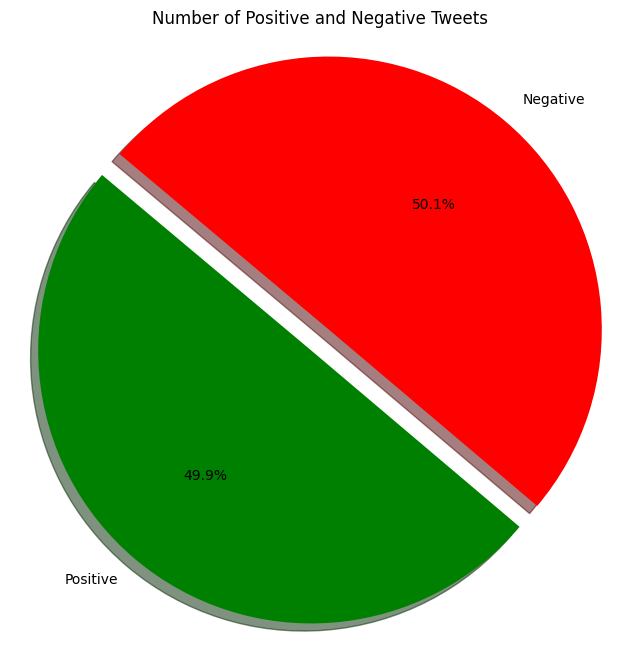

In [120]:
# Count the number of positive and negative tweets
pos_count = len(df_test_pos)
neg_count = len(df_test_neg)

# Labels and counts for the pie chart
labels = ['Positive', 'Negative']
sizes = [pos_count, neg_count]

colors = ['green', 'red']
explode = (0.1, 0) 

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Number of Positive and Negative Tweets')
plt.axis('equal')
plt.show()


### Removing Stopwords and Analyzing Token Frequency Again



In [121]:
# removeing stop words
df_mearge_pos['tokens'] = df_mearge_pos['tokens'].apply(lambda x: [word for word in x if word not in stopwords_list])
df_mearge_neg['tokens'] = df_mearge_neg['tokens'].apply(lambda x: [word for word in x if word not in stopwords_list])

In [122]:
# see the most word frequancy in postive with number of frequancy
df_mearge_pos['tokens'].explode().value_counts()

tokens
ÿßŸÑŸá         5354
ÿßŸÑŸáŸÖ        2328
ÿßŸÑŸáŸÑÿßŸÑ      1517
pos         1336
ÿßŸÑÿÆŸäÿ±       1220
            ... 
ŸÖÿ¥Ÿäÿ©           1
ŸÅÿ±ÿ≥            1
ÿßŸÑŸÖÿ§ŸÖŸÜÿßÿ™       1
ÿßŸÑŸÖÿ≥ŸÑŸÖÿßÿ™       1
ŸÅŸÑÿ±ÿ®           1
Name: count, Length: 48119, dtype: int64

In [123]:
# see the most word frequancy in negtive with number of frequancy
df_mearge_neg['tokens'].explode().value_counts()    

tokens
ÿßŸÑŸá           3101
ÿßŸÑŸä           1586
ŸàÿßŸÑŸá          1373
ÿßŸÜÿß           1315
ÿßŸÜ            1090
              ... 
ÿ•ŸÖŸÉÿßŸÜŸÉ           1
ÿ¥ÿ±ŸäŸÉÿßŸÑÿ≠ŸäÿßŸá       1
ÿßŸÑÿ≥Ÿàÿ¥ÿßŸÑ          1
ÿßÿ™ÿπŸÖŸÇ            1
ŸàÿßŸÜÿÆÿ∞ŸÑ           1
Name: count, Length: 46555, dtype: int64

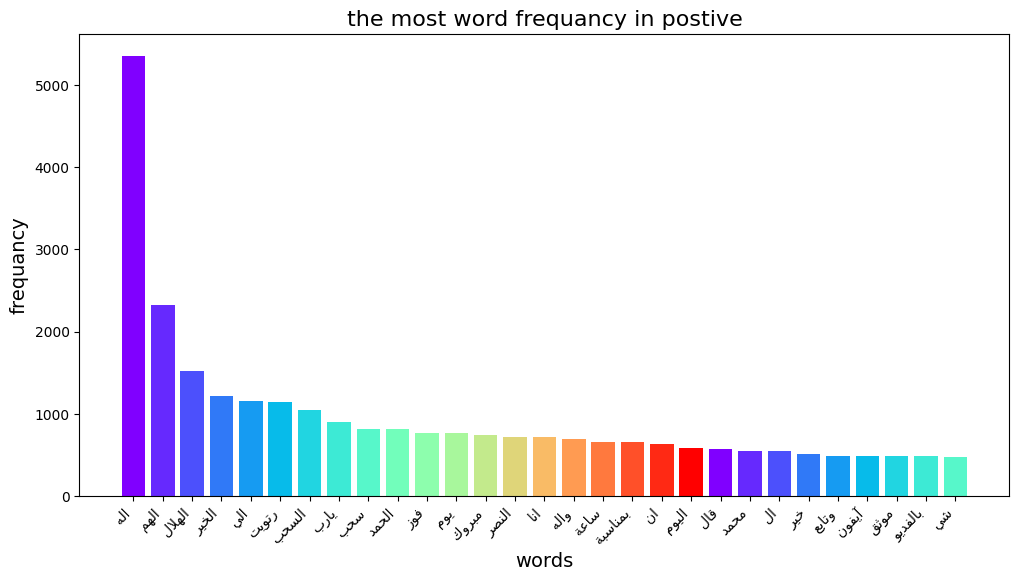

In [124]:
# get the most word frequancy in postive
token_counts = df_mearge_pos['tokens'].explode().value_counts().head(30)
token_counts = token_counts[~token_counts.index.isin(["pos"])]

# Reshape each token for proper Arabic rendering:
reshaped_tokens = [get_display(arabic_reshaper.reshape(token)) for token in token_counts.index]


# make color for bar chart
colors = cm.rainbow(np.linspace(0, 1, 20))
# 
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(reshaped_tokens, token_counts.values, color=colors)

title_ar = get_display(arabic_reshaper.reshape("the most word frequancy in postive"))
xlabel_ar = get_display(arabic_reshaper.reshape("words"))
ylabel_ar = get_display(arabic_reshaper.reshape("frequancy"))

ax.set_title(title_ar, fontsize=16)
ax.set_xlabel(xlabel_ar, fontsize=14)
ax.set_ylabel(ylabel_ar, fontsize=14)

plt.xticks(rotation=45, ha='right')
plt.show()


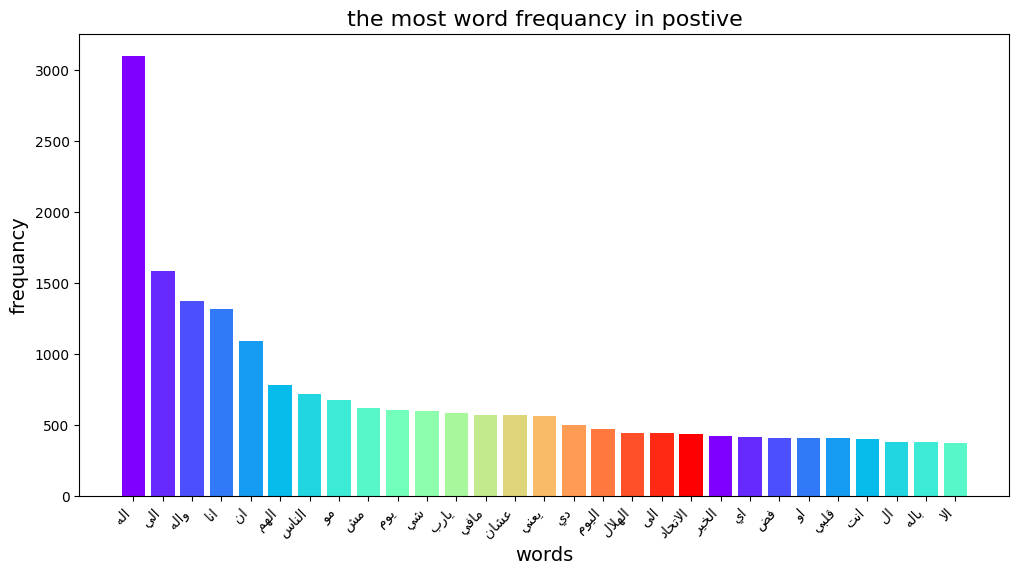

In [125]:
# get the most word frequancy in negtive
token_counts = df_mearge_neg['tokens'].explode().value_counts().head(30)
token_counts = token_counts[~token_counts.index.isin(["neg"])]

# Reshape each token for proper Arabic rendering:
reshaped_tokens = [get_display(arabic_reshaper.reshape(token)) for token in token_counts.index]

# make color for bar chart
colors = cm.rainbow(np.linspace(0, 1, 20))
# 
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(reshaped_tokens, token_counts.values, color=colors)

title_ar = get_display(arabic_reshaper.reshape("the most word frequancy in postive"))
xlabel_ar = get_display(arabic_reshaper.reshape("words"))
ylabel_ar = get_display(arabic_reshaper.reshape("frequancy"))

ax.set_title(title_ar, fontsize=16)
ax.set_xlabel(xlabel_ar, fontsize=14)
ax.set_ylabel(ylabel_ar, fontsize=14)

plt.xticks(rotation=45, ha='right')
plt.show()


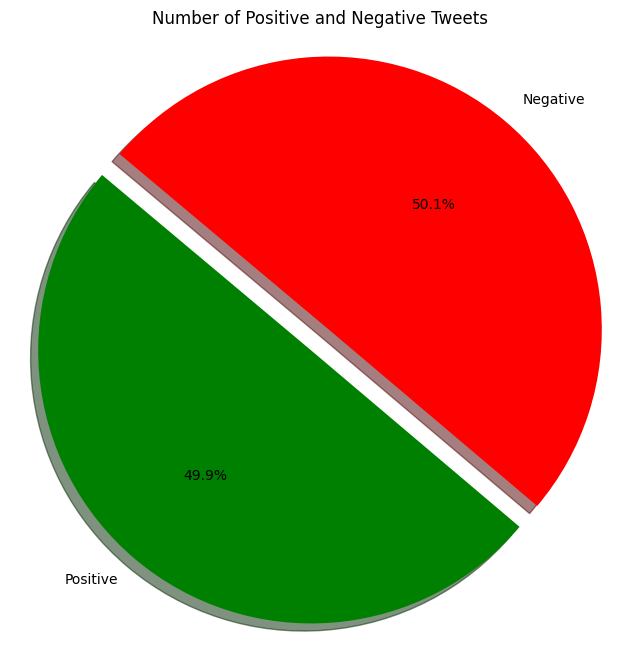

In [126]:
# Count the number of positive and negative tweets
pos_count = len(df_test_pos)
neg_count = len(df_test_neg)

# Labels and counts for the pie chart
labels = ['Positive', 'Negative']
sizes = [pos_count, neg_count]

colors = ['green', 'red']
explode = (0.1, 0) 

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Number of Positive and Negative Tweets')
plt.axis('equal')
plt.show()


# Part 4: Build Model


In [127]:
# Assign labels: 1 for positive tweets and Assign labels:0 for negative tweets.
df_train_pos['label'] = 1
df_train_neg['label'] = 0
df_test_pos['label'] = 1
df_test_neg['label'] = 0

# Combine training and test sets
train_df = pd.concat([df_train_pos, df_train_neg]).reset_index(drop=True)
test_df = pd.concat([df_test_pos, df_test_neg]).reset_index(drop=True)

print("Training Data Sample:")
print(train_df.head())
print("\nTest Data Sample:")
print(test_df.head())

# define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer='word', max_df=0.9, min_df=2)),
    ('clf', LinearSVC())
])

pipeline.fit(train_df["Arabic tweet"], train_df["label"])

y_pred = pipeline.predict(test_df["Arabic tweet"])

accuracy = accuracy_score(test_df["label"], y_pred)
precision = precision_score(test_df["label"], y_pred)
recall = recall_score(test_df["label"], y_pred)
f1 = f1_score(test_df["label"], y_pred)

print("Model Evaluation on Test Set:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("\nClassification Report:")
print(classification_report(test_df["label"], y_pred))

Training Data Sample:
  Sentiment Label                                       Arabic tweet  \
0             pos  ŸÜÿ≠ŸÜ ÿßŸÑÿ∞ŸäŸÜ Ÿäÿ™ÿ≠ŸàŸÑ ŸÉŸÑ ŸÖÿß ŸÜŸàÿØ ÿ£ŸÜ ŸÜŸÇŸàŸÑŸá ÿ•ŸÑŸâ ÿØÿπÿßÿ° ŸÑŸá...   
1             pos  ŸàŸÅŸä ÿßŸÑŸÜŸáÿßŸäÿ© ŸÑŸÜ Ÿäÿ®ŸÇŸâ ŸÖÿπŸÉ ÿ¢ÿ≠ÿØÿ•ŸÑÿß ŸÖŸÜ ÿ±ÿ£Ÿâ ÿßŸÑÿ¨ŸÖÿßŸÑ ŸÅ...   
2             pos                                    ŸÖŸÜ ÿßŸÑÿÆŸäÿ± ŸÜŸÅÿ≥Ÿá üíõ   
3             pos  ÿ≤ŸÑÿ≤ŸÑÿßŸÑŸÖŸÑÿπÿ®ŸÜÿµÿ±ŸÜÿßÿ®ŸäŸÑÿπÿ® ŸÉŸÜ ÿπÿßŸÑŸä ÿßŸÑŸáŸÖŸá ŸàŸÑÿß ÿ™ÿ±ÿ∂Ÿâ ÿ®ÿ∫...   
4             pos  ÿßŸÑÿ¥Ÿäÿ° ÿßŸÑŸàÿ≠ŸäÿØ ÿßŸÑÿ∞Ÿä ŸàÿµŸÑŸàÿß ŸÅŸäŸá ŸÑÿπÿßŸÑŸÖŸäÿ© ŸáŸà ÿßŸÑŸÖÿ≥Ÿäÿßÿ±...   

                                              tokens  label  
0  [ŸÜÿ≠ŸÜ, ÿßŸÑÿ∞ŸäŸÜ, Ÿäÿ™ÿ≠ŸàŸÑ, ŸÉŸÑ, ŸÖÿß, ŸÜŸàÿØ, ÿ£ŸÜ, ŸÜŸÇŸàŸÑŸá, ÿ•ŸÑ...      1  
1  [ŸàŸÅŸä, ÿßŸÑŸÜŸáÿßŸäÿ©, ŸÑŸÜ, Ÿäÿ®ŸÇŸâ, ŸÖÿπŸÉ, ÿ¢ÿ≠ÿØÿ•ŸÑÿß, ŸÖŸÜ, ÿ±ÿ£Ÿâ,...      1  
2                                  [ŸÖŸÜ, ÿßŸÑÿÆŸäÿ±, ŸÜŸÅÿ≥Ÿá]      1  
3  [ÿ≤ŸÑÿ≤ŸÑÿßŸÑŸÖŸÑÿπÿ®ŸÜÿµÿ±ŸÜÿßÿ®ŸäŸÑÿπÿ®, ŸÉŸÜ, ÿπÿßŸÑŸä,

### Sentiment Prediction Function

In [128]:
def predict_sentiment(text, model_pipeline):
    # Map the numeric predictions to their corresponding sentiment strings
    label_map = {1: "Positive", 0: "Negative"}
    
    # If a single string is passed, convert it to a list
    if isinstance(text, str):
        text = [text]
    
    # Make predictions using the trained model pipeline
    numeric_predictions = model_pipeline.predict(text)
    
    sentiment_predictions = [label_map[label] for label in numeric_predictions]
    
    return sentiment_predictions

# Example 
sample_tweet = "ŸÖÿ™ŸàŸÇÿπŸá ŸäÿµŸäÿ± ÿ¥Ÿä üíî"
predicted_label = predict_sentiment(sample_tweet, pipeline)
print("Predicted sentiment:", predicted_label)


Predicted sentiment: ['Negative']
